### Visualization

In [1]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

[]

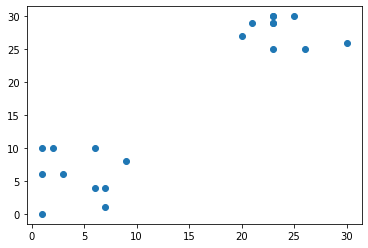

In [2]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.plot()

In [44]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import random

# Initialize seed
random.seed(0)

df = pd.DataFrame({'x':np.array(x,dtype=np.float),'y':np.array(y,dtype=np.float)})

C:\Users\S50177\AppData\Local\Temp/ipykernel_4244/2745779019.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = pd.DataFrame({'x':np.array(x,dtype=np.float),'y':np.array(y,dtype=np.float)})


In [32]:
# DEVIDE BY STD
# Import the whiten function
from scipy.cluster.vq import whiten

# Use the whiten() function to standardize the data
df_scaled = whiten(df)

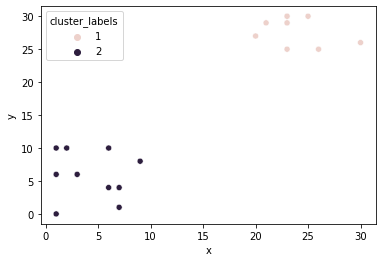

In [40]:
# Use the linkage() function to compute distances
distance_matrix = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

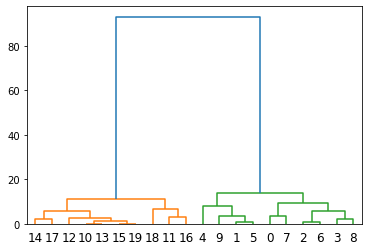

In [41]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

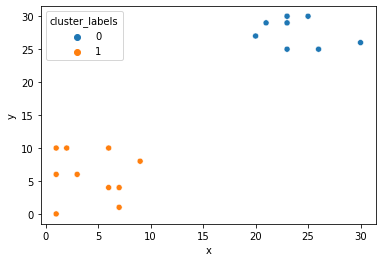

In [46]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
# distortion is sum of squared distances of points from cluster centers
centroids,distortion = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], distortion_list = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

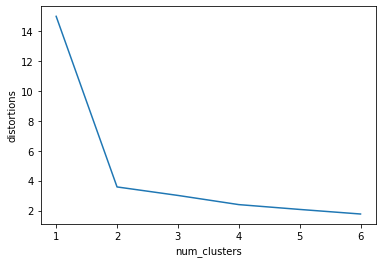

In [47]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df, i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [48]:
print(df[['x', 'y', 'cluster_labels']].groupby('cluster_labels').mean())

                   x     y
cluster_labels            
0               23.7  28.0
1                4.3   5.9


## CV

(320, 320, 3)


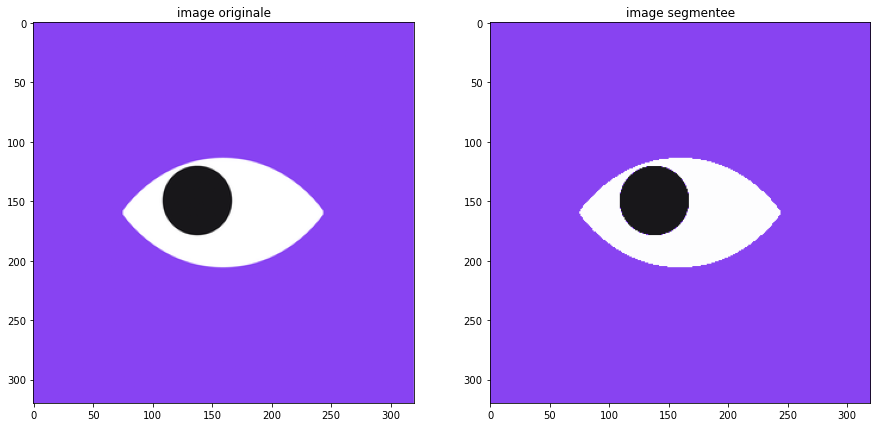

In [86]:
pic = plt.imread('chouafa.png')
print(pic.shape)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1],
pic.shape[2])
fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].title.set_text('image originale')
axs[0].imshow(pic)
axs[1].title.set_text('image segmentee')
axs[1].imshow(cluster_pic)

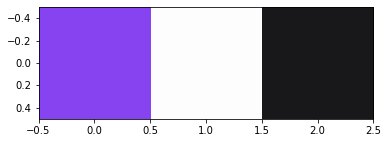

In [87]:
# Display colors of cluster centers
plt.imshow([kmeans.cluster_centers_])
plt.show()

## NLP

In [ ]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3]) 